TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.


In [4]:
import pandas as pd
data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")

y = data.CDRGLOB
X = data.drop(["CDRGLOB"], axis = 1) 
pd.set_option('display.max_columns', None)

print(y,sep = '\n')
print(X,sep = '\n')
print(data.head())

0       0
1       2
2       0
3       0
4       1
       ..
1349    1
1350    2
1351    0
1352    0
1353    0
Name: CDRGLOB, Length: 1354, dtype: int64
      SEX  EDUC  MARISTAT  INDEPEND  RESIDENC  NACCFAM  ANYMEDS  SMOKYRS  \
0       2    18         1         1         1        1        1        0   
1       1    11         1         1         1        1        1        0   
2       2    16         1         1         1        1        1       10   
3       1    14         1         1         1        0        1        0   
4       1    16         1         1         2        0        1       50   
...   ...   ...       ...       ...       ...      ...      ...      ...   
1349    1    20         1         1         1        1        1        0   
1350    1    16         1         2         1        0        1        0   
1351    2    14         2         1         1        1        1        0   
1352    2    20         3         1         1        1        1       25   
1353    2   

In [5]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_model = clf.predict(X_test)

from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_model)*100
print("accuracy score is {} ".format(a))

#cross validation for k = 5
from sklearn.model_selection import cross_val_score
b = cross_val_score(clf, X, y , cv = 5)
print("{} values for k = 5".format(b))

#cross validation for k = 10
from sklearn.model_selection import cross_val_score
c = cross_val_score(clf, X, y, cv = 10)
print("{} values for k =10".format(c))

#comparison of k values
print("mean for k = 5: ", b.mean())
print("mean for k = 10: ", c.mean())

accuracy score is 69.00369003690037 
[0.63099631 0.63837638 0.65682657 0.55350554 0.57407407] values for k = 5
[0.625      0.60294118 0.52941176 0.72794118 0.65925926 0.6962963
 0.6962963  0.42962963 0.51111111 0.66666667] values for k =10
mean for k = 5:  0.610755774224409
mean for k = 10:  0.6144553376906319


TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset. 

In [6]:
#problem1:n_estimator doesn't include in classifier
"""
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

#pipeline = Pipeline([("scaler" , StandardScaler()),("rf",RandomForestClassifier())])
param_grid = {
    
    'max_depth': [4, 5, 10, 15, 20],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5, 7, 10]
    

}

rfc = RandomForestClassifier
grid = GridSearchCV(estimator=rfc, param_grid=param_grid,cv = 3)
grid.fit(X, y)
rfc.best_params_
"""

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.datasets import make_classification\nimport numpy as np\n#from sklearn.pipeline import Pipeline\n#from sklearn.preprocessing import StandardScaler\n\n#pipeline = Pipeline([("scaler" , StandardScaler()),("rf",RandomForestClassifier())])\nparam_grid = {\n    \n    \'max_depth\': [4, 5, 10, 15, 20],\n    \'max_features\': [2, 3, 4, 5, 6],\n    \'min_samples_leaf\': [3, 4, 5, 7, 10]\n    \n\n}\n\nrfc = RandomForestClassifier\ngrid = GridSearchCV(estimator=rfc, param_grid=param_grid,cv = 3)\ngrid.fit(X, y)\nrfc.best_params_\n'

In [7]:
#instead of classifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [15, 25, 35, 45, 55],
    'n_estimators': [100, 200, 300, 400, 500]}
          
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid,cv = 3)
grid_search.fit(X, y)
grid_search.best_params_

KeyboardInterrupt: ignored

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

Text(0, 0.5, 'LTEMPCOR')

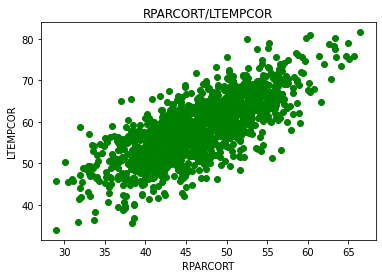

In [19]:
#import pandas as pd
#data_2 = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")

x = data.RPARCORT 
X = data.drop(["CDRGLOB"], axis = 1) 
y = data.LTEMPCOR
Y = data.drop(["LTEMPCOR"], axis = 1) 

import matplotlib.pyplot as plt
plt.scatter(x, y, color= "green",  marker= "o")
plt.title("RPARCORT/LTEMPCOR")
plt.xlabel('RPARCORT')
plt.ylabel('LTEMPCOR')


TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

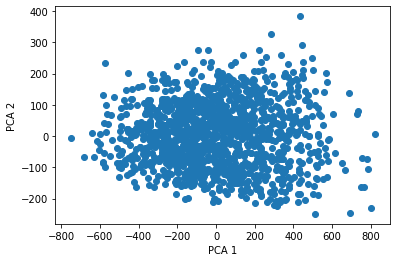

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(X)
plt.scatter(x[:,0], x[:,1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 

Text(0, 0.5, 'LTEMPCOR')

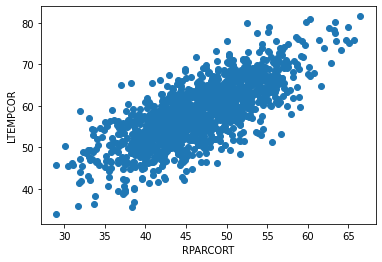

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
plt.scatter(X["RPARCORT"], X["LTEMPCOR"])
plt.xlabel("RPARCORT")
plt.ylabel("LTEMPCOR")
